## Installing dependencies

In [1]:
!pip install tensorflow opencv-python matplotlib

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [5]:
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

In [6]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

# Creating folder Structure

In [7]:
POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor')

In [8]:
os.makedirs(POS_PATH,exist_ok=True)
os.makedirs(NEG_PATH,exist_ok=True)
os.makedirs(ANC_PATH,exist_ok=True)

In [9]:
!tar -xf lfw.tgz

In [10]:
for directory in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw', directory)):
        EX_PATH = os.path.join('lfw', directory, file)
        NEW_PATH = os.path.join(NEG_PATH, file)
        os.replace(EX_PATH, NEW_PATH)

In [11]:
import uuid

In [12]:
os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))

'data\\anchor\\8827d260-577a-11ee-9477-f46d3f20c2ad.jpg'

In [13]:
os.listdir('lfw')

['Aaron_Eckhart',
 'Aaron_Guiel',
 'Aaron_Patterson',
 'Aaron_Peirsol',
 'Aaron_Pena',
 'Aaron_Sorkin',
 'Aaron_Tippin',
 'Abbas_Kiarostami',
 'Abba_Eban',
 'Abdel_Aziz_Al-Hakim',
 'Abdel_Madi_Shabneh',
 'Abdel_Nasser_Assidi',
 'Abdoulaye_Wade',
 'Abdulaziz_Kamilov',
 'Abdullah',
 'Abdullah_Ahmad_Badawi',
 'Abdullah_al-Attiyah',
 'Abdullah_Gul',
 'Abdullah_Nasseef',
 'Abdullatif_Sener',
 'Abdul_Majeed_Shobokshi',
 'Abdul_Rahman',
 'Abel_Aguilar',
 'Abel_Pacheco',
 'Abid_Hamid_Mahmud_Al-Tikriti',
 'Abner_Martinez',
 'Abraham_Foxman',
 'Aby_Har-Even',
 'Adam_Ant',
 'Adam_Freier',
 'Adam_Herbert',
 'Adam_Kennedy',
 'Adam_Mair',
 'Adam_Rich',
 'Adam_Sandler',
 'Adam_Scott',
 'Adelina_Avila',
 'Adel_Al-Jubeir',
 'Adisai_Bodharamik',
 'Adolfo_Aguilar_Zinser',
 'Adolfo_Rodriguez_Saa',
 'Adoor_Gopalakarishnan',
 'Adriana_Lima',
 'Adriana_Perez_Navarro',
 'Adrianna_Zuzic',
 'Adrian_Annus',
 'Adrian_Fernandez',
 'Adrian_McPherson',
 'Adrian_Murrell',
 'Adrian_Nastase',
 'Adrien_Brody',
 'Afton_S

In [14]:
for directory in os.listdir('lfw'):
    for file in os. listdir(os.path.join('lfw', directory)):
      print(os.path.join('lfw', directory))
      print(os.path.join(NEG_PATH,file))

In [15]:
cap = cv2.VideoCapture(0)
while cap.isOpened(): 
    ret, frame = cap.read()
   
    
    
    # Show image back to screen
    cv2.imshow('Image Collection', frame)
    
    # Breaking gracefully
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break
        
# Release the webcam
cap.release()
# Close the image show frame
cv2.destroyAllWindows()

In [16]:
frame

array([[[121, 119, 126],
        [122, 120, 125],
        [123, 120, 123],
        ...,
        [ 48,  44,  48],
        [ 48,  45,  47],
        [ 50,  47,  49]],

       [[121, 120, 125],
        [122, 120, 129],
        [123, 121, 132],
        ...,
        [ 47,  46,  50],
        [ 47,  46,  50],
        [ 48,  47,  51]],

       [[121, 121, 123],
        [120, 121, 126],
        [119, 122, 129],
        ...,
        [ 43,  47,  51],
        [ 42,  46,  50],
        [ 42,  46,  50]],

       ...,

       [[132, 129, 139],
        [130, 130, 139],
        [129, 130, 139],
        ...,
        [ 48,  55,  63],
        [ 47,  55,  63],
        [ 49,  56,  64]],

       [[130, 128, 138],
        [130, 128, 138],
        [129, 127, 136],
        ...,
        [ 48,  55,  63],
        [ 46,  53,  62],
        [ 47,  55,  63]],

       [[133, 130, 142],
        [132, 129, 140],
        [132, 129, 139],
        ...,
        [ 48,  55,  63],
        [ 47,  55,  63],
        [ 46,  53,  62]]

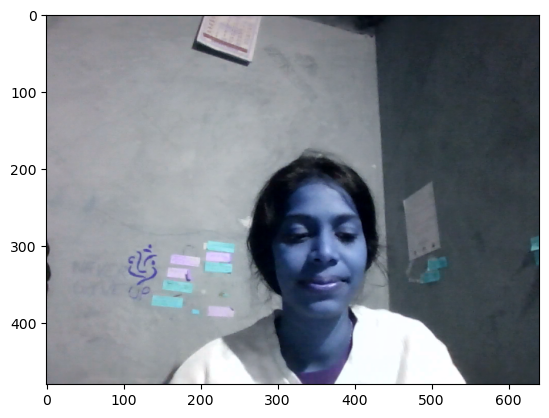

In [17]:
plt.imshow(frame)

In [18]:
frame.shape

(480, 640, 3)

In [19]:
frame[:250,:250:].shape

(250, 250, 3)

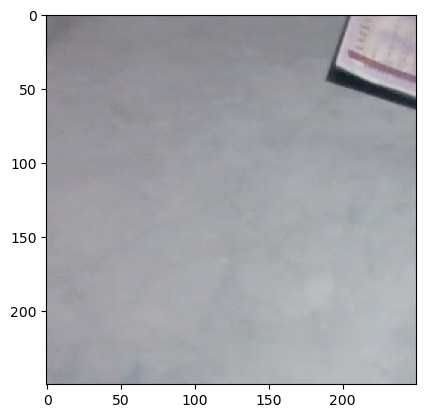

In [20]:
plt.imshow(frame[:250,:250:])

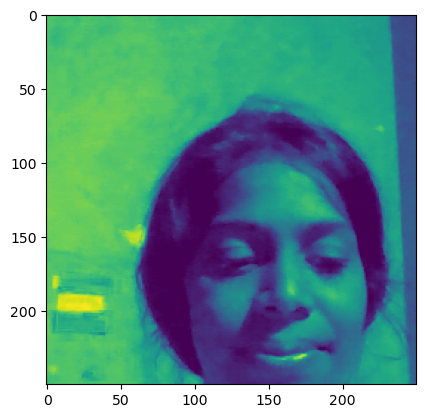

In [21]:
plt.imshow(frame[120:120+250,200:200+250,0])

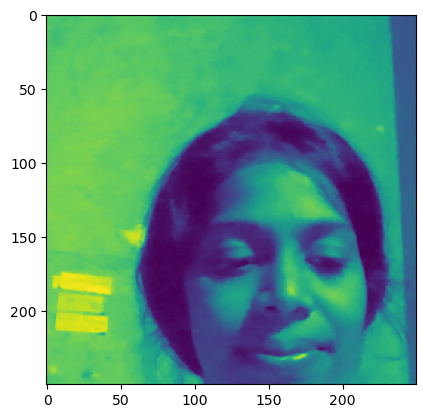

In [22]:
plt.imshow(frame[120:120+250,200:200+250,1])

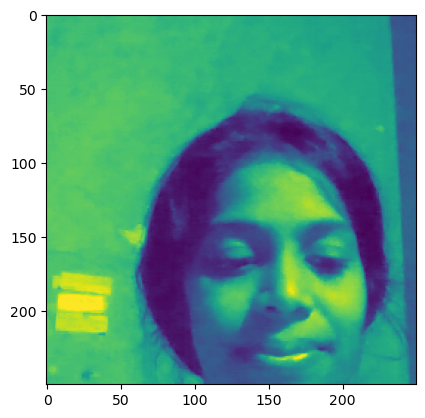

In [23]:
plt.imshow(frame[120:120+250,200:200+250,2])

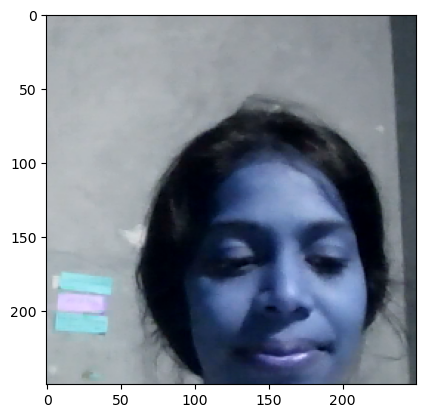

In [24]:
plt.imshow(frame[120:120+250,200:200+250,:])

In [25]:
cap = cv2.VideoCapture(0)
while cap.isOpened(): 
    ret, frame = cap.read()
    
    
    frame = frame[120:120+250,200:200+250, :]
    
     # Show image back to screen
    cv2.imshow('Image Collection', frame)
    
    # Breaking gracefully
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break
        
# Release the webcam
cap.release()
# Close the image show frame
cv2.destroyAllWindows()

In [26]:
print(frame)

[[[180 187 186]
  [180 187 186]
  [178 185 184]
  ...
  [ 80  89  95]
  [ 84  91  97]
  [ 81  89  94]]

 [[180 187 186]
  [180 187 186]
  [180 187 186]
  ...
  [ 79  88  94]
  [ 81  89  95]
  [ 81  89  95]]

 [[180 187 186]
  [180 187 186]
  [180 187 186]
  ...
  [ 77  86  91]
  [ 78  85  92]
  [ 78  85  92]]

 ...

 [[121 123 127]
  [121 123 127]
  [121 123 127]
  ...
  [ 86  96 102]
  [ 83  93  99]
  [ 83  93  99]]

 [[119 123 127]
  [119 123 127]
  [118 122 126]
  ...
  [ 87  96 101]
  [ 87  94 103]
  [ 84  92 100]]

 [[120 124 128]
  [120 124 128]
  [122 125 129]
  ...
  [ 87  97 103]
  [ 85  94 103]
  [ 86  94 103]]]


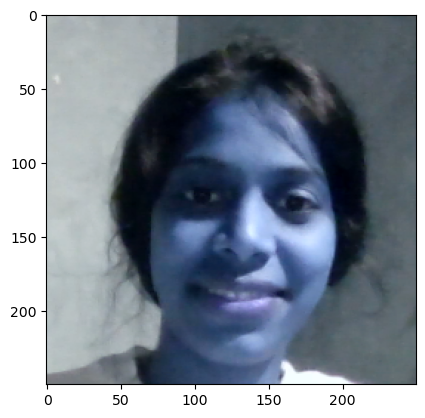

In [27]:
plt.imshow(frame)

In [28]:
import uuid

In [29]:
uuid.uuid1()

UUID('a1271330-577a-11ee-8b15-f46d3f20c2ad')

In [30]:
os.path.join(ANC_PATH,'{}.jpg'.format(uuid.uuid1()))

'data\\anchor\\a12858a5-577a-11ee-bc83-f46d3f20c2ad.jpg'

In [31]:
if not os.path.exists(ANC_PATH):
    os.makedirs(ANC_PATH)


In [32]:
# Establish a connection to the webcam
cap = cv2.VideoCapture(0)
while cap.isOpened(): 
    ret, frame = cap.read()
   
    # Cut down frame to 250x250px
    frame = frame[120:120+250,200:200+250, :]
    
    # Collect anchors 
    if cv2.waitKey(2) & 0XFF == ord('a'):
        # Create the unique file path 
        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out anchor image
        cv2.imwrite(imgname, frame)
    
    # Collect positives
    if cv2.waitKey(1) & 0XFF == ord('p'):
        # Create the unique file path 
        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out positive image
        cv2.imwrite(imgname, frame)
    
    # Show image back to screen
    cv2.imshow('Image Collection', frame)
    
    # Breaking gracefully
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break
        
# Release the webcam
cap.release()
# Close the image show frame
cv2.destroyAllWindows()

In [33]:
frame

array([[[167, 174, 175],
        [167, 174, 174],
        [167, 174, 173],
        ...,
        [ 46,  57,  60],
        [ 44,  57,  61],
        [ 45,  59,  61]],

       [[167, 174, 175],
        [167, 174, 175],
        [167, 174, 175],
        ...,
        [ 46,  58,  59],
        [ 46,  59,  60],
        [ 45,  60,  62]],

       [[162, 169, 171],
        [162, 169, 171],
        [162, 169, 171],
        ...,
        [ 46,  57,  60],
        [ 47,  60,  63],
        [ 47,  61,  64]],

       ...,

       [[163, 172, 171],
        [164, 173, 172],
        [165, 174, 173],
        ...,
        [255, 253, 255],
        [255, 253, 255],
        [255, 253, 255]],

       [[164, 173, 174],
        [165, 174, 175],
        [165, 174, 175],
        ...,
        [248, 254, 255],
        [251, 253, 255],
        [253, 253, 255]],

       [[165, 174, 175],
        [166, 175, 176],
        [166, 175, 176],
        ...,
        [250, 254, 255],
        [253, 253, 255],
        [254, 253, 255]]

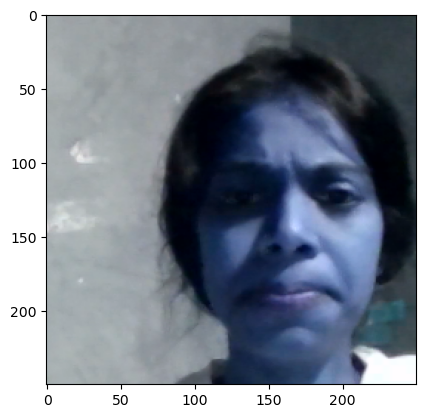

In [34]:
plt.imshow(frame)

In [35]:
print(frame)

[[[167 174 175]
  [167 174 174]
  [167 174 173]
  ...
  [ 46  57  60]
  [ 44  57  61]
  [ 45  59  61]]

 [[167 174 175]
  [167 174 175]
  [167 174 175]
  ...
  [ 46  58  59]
  [ 46  59  60]
  [ 45  60  62]]

 [[162 169 171]
  [162 169 171]
  [162 169 171]
  ...
  [ 46  57  60]
  [ 47  60  63]
  [ 47  61  64]]

 ...

 [[163 172 171]
  [164 173 172]
  [165 174 173]
  ...
  [255 253 255]
  [255 253 255]
  [255 253 255]]

 [[164 173 174]
  [165 174 175]
  [165 174 175]
  ...
  [248 254 255]
  [251 253 255]
  [253 253 255]]

 [[165 174 175]
  [166 175 176]
  [166 175 176]
  ...
  [250 254 255]
  [253 253 255]
  [254 253 255]]]


## Get Image  Directories

In [36]:
anchor = tf.data.Dataset.list_files(ANC_PATH+'\*.jpg').take(300)
positive = tf.data.Dataset.list_files(POS_PATH+'\*.jpg').take(300)
negative = tf.data.Dataset.list_files(NEG_PATH+'\*.jpg').take(300)

In [37]:
ANC_PATH+'\*.jpg'

'data\\anchor\\*.jpg'

In [38]:
dir_test = anchor.as_numpy_iterator()

## Preprocessing -Scale and resize

In [39]:
dir_test.next()

b'data\\anchor\\20240776-517a-11ee-b82e-f46d3f20c2ad.jpg'

In [40]:
def preprocess(file_path):
    
    # Read in image from file path
    byte_img = tf.io.read_file(file_path)
    # Load in the image 
    img = tf.io.decode_jpeg(byte_img)
    
    # Preprocessing steps - resizing the image to be 100x100x3
    img = tf.image.resize(img, (100,100))
    # Scale image to be between 0 and 1 
    img = img / 255.0
    
    # Return image
    return img

In [41]:
img = preprocess('data\\anchor\\48e92b93-517a-11ee-83a4-f46d3f20c2ad.jpg')
 

In [42]:
img.numpy().max() 

1.0

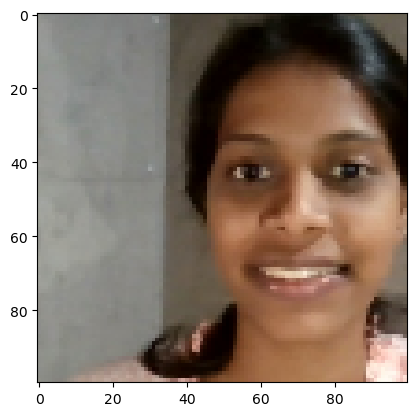

In [43]:
plt.imshow(img)

# create labelled dataset

In [44]:
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

In [45]:
tf.zeros(len(anchor))

<tf.Tensor: shape=(300,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [46]:
tf.ones(len(negative))

<tf.Tensor: shape=(300,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1

In [47]:
data

<_ConcatenateDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [48]:
sample = data.as_numpy_iterator()

In [49]:
sample.next()

(b'data\\anchor\\3bcde769-517a-11ee-823e-f46d3f20c2ad.jpg',
 b'data\\positive\\c48363ee-517a-11ee-ae19-f46d3f20c2ad.jpg',
 1.0)

In [50]:
example = sample.next()

In [51]:
example

(b'data\\anchor\\48e92b93-517a-11ee-83a4-f46d3f20c2ad.jpg',
 b'data\\positive\\cb58de55-517a-11ee-97fe-f46d3f20c2ad.jpg',
 1.0)

## Build train test partition

In [52]:
def preprocess_twin(input_img,validation_img,label):
    return(preprocess(input_img),preprocess(validation_img),label)

In [53]:
res = preprocess_twin(*example)

In [54]:
res

(<tf.Tensor: shape=(100, 100, 3), dtype=float32, numpy=
 array([[[0.564951  , 0.57279414, 0.5531863 ],
         [0.55      , 0.55784315, 0.54019606],
         [0.5362745 , 0.5441176 , 0.5323529 ],
         ...,
         [0.40857843, 0.38112745, 0.31838235],
         [0.40490195, 0.38039216, 0.32352942],
         [0.40686274, 0.38333333, 0.32843137]],
 
        [[0.5715686 , 0.57941175, 0.5598039 ],
         [0.5590686 , 0.56691176, 0.5492647 ],
         [0.5470588 , 0.55490196, 0.54313725],
         ...,
         [0.41127452, 0.38210785, 0.3245098 ],
         [0.41029412, 0.37892157, 0.32941177],
         [0.4117647 , 0.3882353 , 0.33529413]],
 
        [[0.5764706 , 0.58137256, 0.5617647 ],
         [0.5740196 , 0.5781863 , 0.5612745 ],
         [0.5708333 , 0.57279414, 0.56397057],
         ...,
         [0.41642156, 0.38504902, 0.33995098],
         [0.41862744, 0.3872549 , 0.34362745],
         [0.41764706, 0.3882353 , 0.34411764]],
 
        ...,
 
        [[0.55      , 0.5539216 

In [55]:
res[0]

<tf.Tensor: shape=(100, 100, 3), dtype=float32, numpy=
array([[[0.564951  , 0.57279414, 0.5531863 ],
        [0.55      , 0.55784315, 0.54019606],
        [0.5362745 , 0.5441176 , 0.5323529 ],
        ...,
        [0.40857843, 0.38112745, 0.31838235],
        [0.40490195, 0.38039216, 0.32352942],
        [0.40686274, 0.38333333, 0.32843137]],

       [[0.5715686 , 0.57941175, 0.5598039 ],
        [0.5590686 , 0.56691176, 0.5492647 ],
        [0.5470588 , 0.55490196, 0.54313725],
        ...,
        [0.41127452, 0.38210785, 0.3245098 ],
        [0.41029412, 0.37892157, 0.32941177],
        [0.4117647 , 0.3882353 , 0.33529413]],

       [[0.5764706 , 0.58137256, 0.5617647 ],
        [0.5740196 , 0.5781863 , 0.5612745 ],
        [0.5708333 , 0.57279414, 0.56397057],
        ...,
        [0.41642156, 0.38504902, 0.33995098],
        [0.41862744, 0.3872549 , 0.34362745],
        [0.41764706, 0.3882353 , 0.34411764]],

       ...,

       [[0.55      , 0.5539216 , 0.53431374],
        [0.55

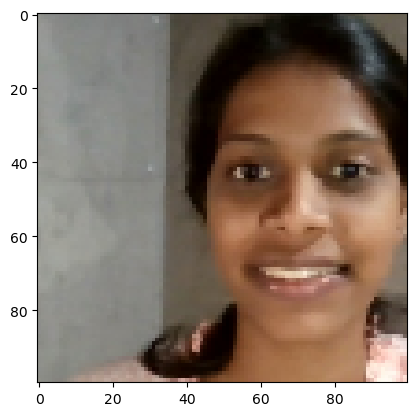

In [56]:
plt.imshow(res[0])

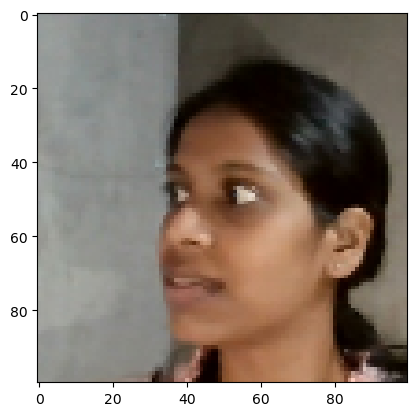

In [57]:
plt.imshow(res[1])

In [58]:
res[2]

1.0

In [59]:
## build data loader pipeline
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=1024)

In [60]:
data

<_ShuffleDataset element_spec=(TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [61]:
sample = data.as_numpy_iterator()

In [62]:
len(sample.next())

3

In [63]:
sample.next()[0]

array([[[0.49779412, 0.5330882 , 0.52916664],
        [0.49313724, 0.51666665, 0.5147059 ],
        [0.4862745 , 0.50980395, 0.5019608 ],
        ...,
        [0.3262255 , 0.3110294 , 0.2637255 ],
        [0.3254902 , 0.31764707, 0.26666668],
        [0.3254902 , 0.31764707, 0.26666668]],

       [[0.5107843 , 0.53431374, 0.5264706 ],
        [0.49436274, 0.51740193, 0.50980395],
        [0.4897059 , 0.50686276, 0.5022059 ],
        ...,
        [0.34534314, 0.32181373, 0.2747549 ],
        [0.34019607, 0.32254902, 0.2754902 ],
        [0.34313726, 0.3254902 , 0.2784314 ]],

       [[0.5242647 , 0.5448529 , 0.53112745],
        [0.5107843 , 0.53088236, 0.51740193],
        [0.4970588 , 0.5156863 , 0.5029412 ],
        ...,
        [0.3497549 , 0.3247549 , 0.2740196 ],
        [0.35196078, 0.32843137, 0.28137255],
        [0.34779412, 0.3242647 , 0.27720588]],

       ...,

       [[0.50759804, 0.52916664, 0.50465685],
        [0.50686276, 0.52843136, 0.50392157],
        [0.50147057, 0

In [64]:
samp = sample.next()

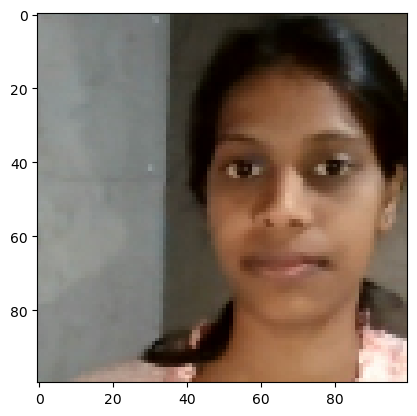

In [65]:
plt.imshow(samp[0])

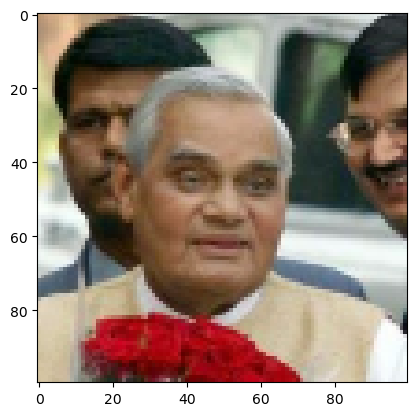

In [66]:
samp = sample.next()
plt.imshow(samp[1])


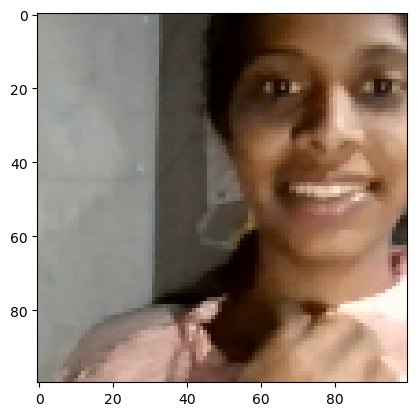

In [67]:
plt.imshow(samp[0])

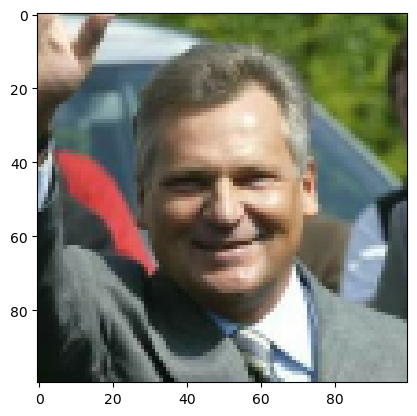

In [68]:
samp = sample.next()
plt.imshow(samp[1])

In [69]:
samp[2]

0.0

In [70]:
round(len(data)*.77)

462

In [71]:

data

<_ShuffleDataset element_spec=(TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [72]:
## Training partition
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [73]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(None, 100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

train_data

In [74]:
train_sample= train_data.as_numpy_iterator()

In [75]:
train_sample = train_sample.next()

In [76]:
len(train_sample[0])

16

In [77]:
round(len(data)*.3)

180

In [78]:
## testing Partiton
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

## Model Engineering

In [79]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten

In [80]:
inp = Input(shape=(100,100,3),name = 'input_image')
inp

<KerasTensor: shape=(None, 100, 100, 3) dtype=float32 (created by layer 'input_image')>

In [81]:
c1 = Conv2D(64, (10,10),activation = 'relu')(inp)
c1

<KerasTensor: shape=(None, 91, 91, 64) dtype=float32 (created by layer 'conv2d')>

In [82]:
m1 = MaxPooling2D(64, (2,2), padding='same')(c1)
m1

<KerasTensor: shape=(None, 46, 46, 64) dtype=float32 (created by layer 'max_pooling2d')>

In [83]:
c2 = Conv2D(128, (7,7),activation = 'relu')(m1)
c2

<KerasTensor: shape=(None, 40, 40, 128) dtype=float32 (created by layer 'conv2d_1')>

In [84]:
m2 = MaxPooling2D(64, (2,2), padding='same')(c2)
m2

<KerasTensor: shape=(None, 20, 20, 128) dtype=float32 (created by layer 'max_pooling2d_1')>

In [85]:
  # Third block
c3 = Conv2D(128, (4,4),activation = 'relu')(m2)
m3 = MaxPooling2D(64, (2,2), padding='same')(c3)

In [86]:
c4 = Conv2D(256, (4,4), activation = 'relu')(m3)
f1 = Flatten()(c4)
d1 = Dense(4096,activation='sigmoid')(f1)
    

In [87]:
c4

<KerasTensor: shape=(None, 6, 6, 256) dtype=float32 (created by layer 'conv2d_3')>

In [88]:
f1

<KerasTensor: shape=(None, 9216) dtype=float32 (created by layer 'flatten')>

In [89]:
d1

<KerasTensor: shape=(None, 4096) dtype=float32 (created by layer 'dense')>

In [90]:

mod = Model(inputs=[inp], outputs=[d1], name='embedding')


In [91]:
 
mod.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 91, 91, 64)        19264     
                                                                 
 max_pooling2d (MaxPooling2  (None, 46, 46, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 128)       401536    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 20, 20, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 17, 17, 128)       26

In [92]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Model

def make_embedding():
    inp = Input(shape=(100, 100, 3), name='input_image')
    
    # First box
    c1 = Conv2D(64, (10, 10), activation='relu')(inp)
    m1 = MaxPooling2D((2, 2), padding='same')(c1)
    
    # Second Box
    c2 = Conv2D(128, (7, 7), activation='relu')(m1)
    m2 = MaxPooling2D((2, 2), padding='same')(c2) 
    
    # Third block
    c3 = Conv2D(128, (4, 4), activation='relu')(m2)
    m3 = MaxPooling2D((2, 2), padding='same')(c3) 
    
    ## Final embedding block
    c4 = Conv2D(256, (4, 4), activation='relu')(m3)
    f1 = Flatten()(c4)
    d1 = Dense(4096, activation='sigmoid')(f1)
    
    return Model(inputs=[inp], outputs=[d1], name='embedding')

# Create the model
embedding = make_embedding()

# Get the summary of the model
embedding.summary()



Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 91, 91, 64)        19264     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 46, 46, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 40, 40, 128)       401536    
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 20, 20, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 17, 17, 128)       26

# Build distance layer

In [93]:
### siemase l1 distance class
class L1Dist(Layer):
    
    # Init method - inheritance
    def __init__(self, **kwargs):
        super().__init__()
       
    # Magic happens here - similarity calculation
    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)

In [94]:
l1 = L1Dist()

In [95]:
#ll1(anchor_embedding, validation_embedding)

## Make siamaese neural network

In [96]:
input_image = Input(name='input_img', shape=(100,100,3))
validation_image = Input(name='validation_img', shape=(100,100,3))

In [97]:
inp_embedding = embedding(input_image)
val_embedding = embedding(validation_image)

In [98]:
siamese_layer = L1Dist()

In [99]:
distances = siamese_layer(inp_embedding, val_embedding)

In [100]:
classifier = Dense(1, activation='sigmoid')(distances)

In [101]:
def make_siamese_model(): 
    
    # Anchor image input in the network
    input_image = Input(name='input_img', shape=(100,100,3))
    
    # Validation image in the network 
    validation_image = Input(name='validation_img', shape=(100,100,3))
    
    # Combine siamese distance components
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))
    
    # Classification layer 
    classifier = Dense(1, activation='sigmoid')(distances)
    
    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [102]:
siamese_model = make_siamese_model()

In [103]:

siamese_model.summary()


Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 100, 100, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 4096)                 3896044   ['input_img[0][0]',           
                                                          8          'validation_img[0][0]']      
                                                                                     

# Training 

## Set up Loss and Optimizer

In [104]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [105]:
opt = tf.keras.optimizers.Adam(1e-4)

In [106]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_model)

## Build Train Step Function

In [107]:
test_batch = train_data.as_numpy_iterator()

In [108]:
batch_1 = test_batch.next()

In [109]:
batch_1

(array([[[[0.49191177, 0.5272059 , 0.5232843 ],
          [0.4872549 , 0.5107843 , 0.5107843 ],
          [0.48897058, 0.50661767, 0.5095588 ],
          ...,
          [0.10686275, 0.10882353, 0.0870098 ],
          [0.08333334, 0.08308823, 0.05245098],
          [0.07647059, 0.07647059, 0.04509804]],
 
         [[0.50416666, 0.5276961 , 0.5276961 ],
          [0.49411765, 0.5142157 , 0.5154412 ],
          [0.4879902 , 0.5022059 , 0.50416666],
          ...,
          [0.13112745, 0.12328431, 0.10196079],
          [0.10980392, 0.09681372, 0.06372549],
          [0.10392157, 0.09117647, 0.05392157]],
 
         [[0.5107843 , 0.52843136, 0.5254902 ],
          [0.51617646, 0.53186274, 0.5294118 ],
          [0.51053923, 0.5203431 , 0.51642156],
          ...,
          [0.14828432, 0.13455883, 0.11397059],
          [0.12303922, 0.0997549 , 0.06960785],
          [0.11764706, 0.09019608, 0.05098039]],
 
         ...,
 
         [[0.77156866, 0.66764706, 0.61764705],
          [0.74852

In [110]:
X = batch_1[:2]

In [111]:
np.array(X).shape

(2, 16, 100, 100, 3)

In [112]:
y = batch_1[2]

In [113]:
y

array([0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0.],
      dtype=float32)

In [114]:
@tf.function
def train_step(batch):
    
    # Record all of our operations 
    with tf.GradientTape() as tape:     
        # Get anchor and positive/negative image
        X = batch[:2]
        # Get label
        y = batch[2]
        
        # Forward pass
        yhat = siamese_model(X, training=True)
        # Calculate loss
        loss = binary_cross_loss(y, yhat)
    print(loss)
        
    # Calculate gradients
    grad = tape.gradient(loss, siamese_model.trainable_variables)
    
    # Calculate updated weights and apply to siamese model
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))
    
    # Return loss
    return loss
        
        
        

# Build training loop

In [115]:
def train(data, EPOCHS):
    # Loop through epochs
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))
        
        
        
        # Loop through each batch
        for idx, batch in enumerate(data):
            train_step(batch)
           
            progbar.update(idx+1)
        
        
        # Save checkpoints
        if epoch % 10 == 0: 
            checkpoint.save(file_prefix=checkpoint_prefix)

In [116]:
EPOCHS = 50

In [117]:
train(train_data, EPOCHS)


 Epoch 1/50
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
27/27 [==============================] - 80s 3s/step

 Epoch 2/50
27/27 [==============================] - 78s 3s/step

 Epoch 3/50
27/27 [==============================] - 81s 3s/step

 Epoch 4/50
27/27 [==============================] - 75s 3s/step

 Epoch 5/50
27/27 [==============================] - 75s 3s/step

 Epoch 6/50
27/27 [==============================] - 76s 3s/step

 Epoch 7/50
27/27 [==============================] - 75s 3s/step

 Epoch 8/50
27/27 [==============================] - 73s 3s/step

 Epoch 9/50
27/27 [==============================] - 76s 3s/step

 Epoch 10/50
27/27 [==============================] - 77s 3s/step

 Epoch 11/50
27/27 [==============================] - 77s 3s/step

 Epoch 12/50
27/27 [==============================] - 79s 3s/step

 Epoch 13/50
27/27 [==============================

# Evaluate model

In [118]:
from tensorflow.keras.metrics import Precision, Recall

In [119]:
test_input,test_val,y_true = test_data.as_numpy_iterator().next()

In [120]:
test_var = test_data.as_numpy_iterator().next()


In [121]:
len(test_var[1])


16

In [122]:
y_hat = siamese_model.predict([test_input,test_val])
y_hat

1/1 [==============================] - 1s 1s/step


array([[8.4809035e-12],
       [9.9997580e-01],
       [9.9999988e-01],
       [1.0000000e+00],
       [3.6868013e-09],
       [8.3336850e-08],
       [5.3853303e-13],
       [1.5772471e-07],
       [1.0000000e+00],
       [1.0000000e+00],
       [4.1791734e-10],
       [1.1337183e-09],
       [3.9800369e-10],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.6292010e-07]], dtype=float32)

In [123]:
#post processing the result
[1 if prediction > 0.5 else 0 for prediction in y_hat]


[0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0]

In [124]:
y_true

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.],
      dtype=float32)

In [125]:
m = Recall()
m.update_state(y_true,y_hat)
m.result().numpy



<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=float32, numpy=1.0>>

In [126]:
m = Precision()
m.update_state(y_true,y_hat)
m.result().numpy

<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=float32, numpy=1.0>>

## Viz Model

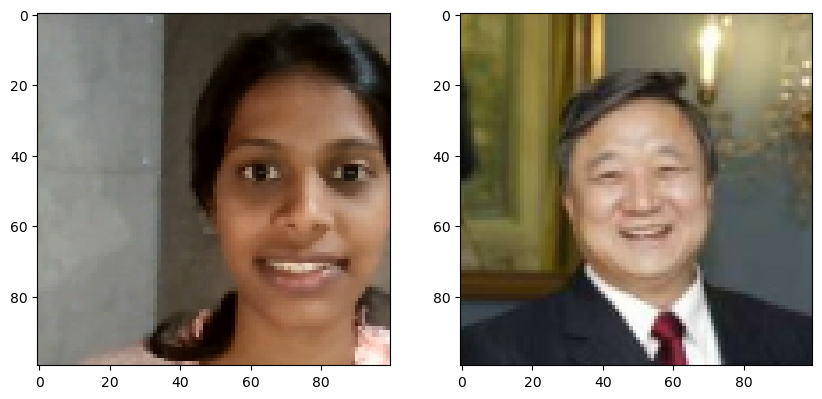

In [127]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.imshow(test_input[5])
plt.subplot(1,2,2)
plt.imshow(test_val[5])
plt.show()

# save model

In [128]:
siamese_model.save('siamesemodel.h5')

C:\Users\vrush\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [129]:
# Reload model 
model = tf.keras.models.load_model('siamesemodel.h5', 
                                   custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [130]:
tf.keras.models.load_model??

In [131]:

model.predict([test_input,test_val])

1/1 [==============================] - 1s 878ms/step


array([[8.4809035e-12],
       [9.9997580e-01],
       [9.9999988e-01],
       [1.0000000e+00],
       [3.6868013e-09],
       [8.3336850e-08],
       [5.3853303e-13],
       [1.5772471e-07],
       [1.0000000e+00],
       [1.0000000e+00],
       [4.1791734e-10],
       [1.1337183e-09],
       [3.9800369e-10],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.6292010e-07]], dtype=float32)

In [132]:
model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 100, 100, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 4096)                 3896044   ['input_img[0][0]',           
                                                          8          'validation_img[0][0]']      
                                                                                     

# Real time test

## verification function

In [138]:
def verify(model, detection_threshold, verification_threshold):
    # Build results array
    results = []
    for image in os.listdir(os.path.join('application_data', 'verification_images')):
        input_img = preprocess(os.path.join('application_data', 'input_images', 'input_image.jpg'))
        validation_img = preprocess(os.path.join('application_data', 'verification_images', image))
        
        # Make Predictions 
        result = model.predict(list(np.expand_dims([input_img, validation_img], axis=1)))
        results.append(result)
    
    # Detection Threshold: Metric above which a prediciton is considered positive 
    detection = np.sum(np.array(results) > detection_threshold)
    
    # Verification Threshold: Proportion of positive predictions / total positive samples 
    verification = detection / len(os.listdir(os.path.join('application_data', 'verification_images'))) 
    verified = verification > verification_threshold
    
    return results, verified

In [144]:

 cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    frame = frame[120:120+250,200:200+250, :]
    
    cv2.imshow('Verification', frame)
    
    # Verification trigger
    if cv2.waitKey(10) & 0xFF == ord('v'):
        # Save input image to application_data/input_image folder 
        cv2.imwrite(os.path.join('application_data', 'input_images', 'input_image.jpg'), frame)
        # Run verification
        results, verified = verify(model, 0.9, 0.7)
        print(verified)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()   

1/1 [==============================] - 0s 32ms/step
False
1/1 [==============================] - 0s 63ms/step
False
1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 47ms/step
True


In [ ]:
30/50

In [152]:
np.sum(np.squeeze(results) > 0.9)

66

In [153]:
66/50

1.32